# Today and tomorrow

**An introduction to nonlinear solvers**

*Coursework 2 now available: deadline Dec 13 at 2:00PM*

# Why do we need nonlinear solvers?

> Given a continuous function $f(x)$, the problem is to find a point $x^*$ such that $f(x^*) = 0$. That is, $x^*$ is a solution of the equation $f(x) = 0$ and is called a **root of $f(x)$**.

## Examples

1.  The linear equation $f(x) = a x + b = 0$ has a single solution at $x^* = -\frac{b}{a}$.

2.  The quadratic equation $f(x) = a x^2 + b x + c = 0$ is nonlinear , but simple enough to have a known formula for the solutions

    $$
    x^* = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
    $$

3.  A general nonlinear equation $f(x) = 0$ rarely has a formula like those above which can be used to calculate its roots.

## Example from last year's exam paper

We want to solve the quadratic equation

$$f(x) = x^2 -(m+\frac{1}{m}) x + 1 = 0$$

for large values of $m$. The exact solutions are $m$ and $\frac{1}{m}$.

In [1]:
# implementation of quadratic formula
import numpy as np


def quad(a, b, c):
    """
    Return the roots of the quadratic polynomial a x^2 + b x + c = 0.
    """
    d = np.sqrt(b * b - 4 * a * c)
    return (-b + d) / (2 * a), (-b - d) / (2 * a)

In [2]:
# test for m = 1e8
m = 1e8
roots = quad(1, -(m + 1 / m), 1)

print(f"{roots=}")

roots=(100000000.0, 1.4901161193847656e-08)


In [3]:
# absolute and relative errors
exact_roots = (m, 1 / m)

abs_error = (abs(roots[0] - exact_roots[0]), abs(roots[1] - exact_roots[1]))
rel_error = (abs_error[0] / m, abs_error[1] / (1 / m))

print(f"{abs_error=}")
print(f"{rel_error=}")

abs_error=(0.0, 4.901161193847656e-09)
rel_error=(0.0, 0.49011611938476557)


## The need for implicit time stepping methods (1)

Consider the differential equation

$$
x'(t) = - 2 x(t), \qquad \text{ subject to } \quad x(0) = 1.
$$

In [4]:
import numpy as np


def f(x, t):
    return -2 * x


def euler(x0, dt, T):
    # initialise memory
    n = int(T / dt)
    x = np.empty(n + 1)
    t = np.empty(n + 1)

    # starting values
    x[0] = x0
    t[0] = 0.0

    # do the time loop
    for j in range(n):
        x[j + 1] = x[j] + dt * f(x[j], t[j])
        t[j + 1] = t[j] + dt

    return x, t

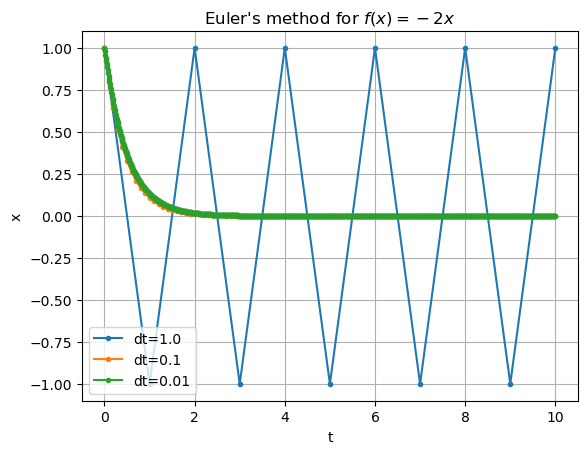

In [5]:
from matplotlib import pyplot as plt

x, t = euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, ".-", label=f"dt=1.0")

x, t = euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.1")

x, t = euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.01")

plt.title("Euler's method for $f(x) = -2x$")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

Recall explicit Euler says:

$$
x^{(j+1)} = x^{(j)} + \mathrm{dt} f(t^{(j)}, x^{(j)})
$$


Consider instead the **implicit Euler method**:

$$
x^{(j+1)} = x^{(j)} + \mathrm{dt} f(t^{(j+1)}, x^{(j+1)})
$$

We can't simply evaluate the right hand side since we don't know $x^{(j+1)}$ yet!

For $f(x, t) = -2x$, we can compute that

$$
\begin{aligned}
x^{(j+1)} & = x^{(j)} + \mathrm{dt} f(t^{(j+1)}, x^{(j+1)}) \\
        & = x^{(j)} - 2 \mathrm{dt}t x^{(j+1)} \\
(1 + 2 \Delta t) x^{(j+1)} & = x^{(j)} \\
x^{(j+1)} & = 1 / (1 + 2 \mathrm{dt}) x^{(j)}.
\end{aligned}
$$

In [6]:
def implicit_euler(x0, dt, T):
    # initialise memory
    n = int(T / dt)
    x = np.empty(n + 1)
    t = np.empty(n + 1)

    # starting values
    x[0] = x0
    t[0] = 0.0

    # do the time loop
    for j in range(n):
        x[j + 1] = x[j] / (1.0 + 2.0 * dt)
        t[j + 1] = t[j] + dt

    return x, t

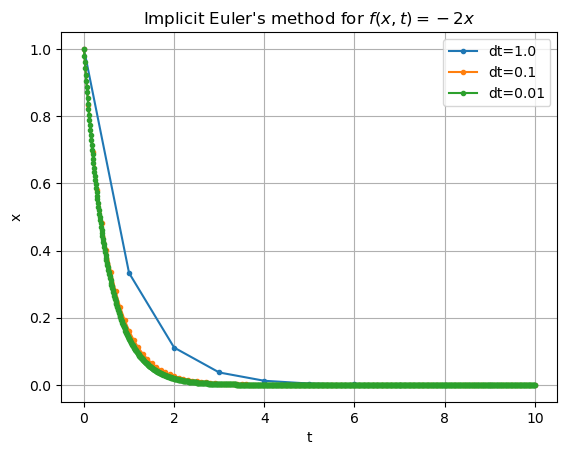

In [7]:
x, t = implicit_euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, ".-", label=f"dt=1.0")

x, t = implicit_euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.1")

x, t = implicit_euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.01")

plt.title("Implicit Euler's method for $f(x, t) = -2x$")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

## The need for implicit time stepping methods (2)

Consider the differential equation

$$
x'(t) = - 2 x(t)^3 \exp(-(1-x(t)^2)), \qquad \text{ subject to } \quad x(0) = 1.
$$

In [8]:
def f(x, t):
    return -2 * x**3 * np.exp(-(1 - x**2))

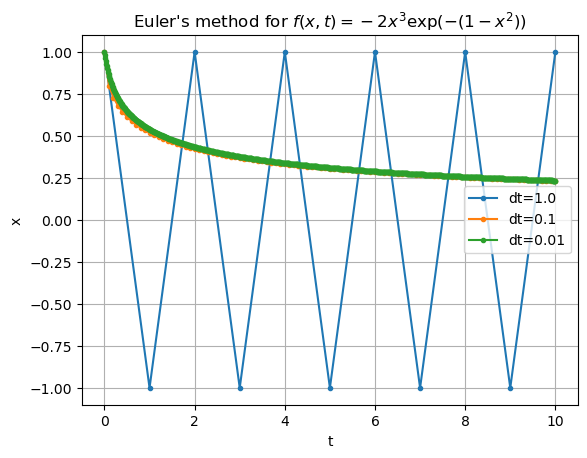

In [9]:
x, t = euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, ".-", label=f"dt=1.0")

x, t = euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.1")

x, t = euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.01")

plt.title("Euler's method for $f(x, t) = - 2 x^3 \exp(-(1-x^2))$")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

We might wish to use an implicit method, but how can we undo $f$??

> Use a nonlinear solver!

## Other difficult problems (1)


The following formula allows the monthly repayments ($M$) on a compound interest mortgage (for a borrowing of $P$) to be calculated based upon an annual interest rate of $r$% and $n$ monthly payments ([more details](http://www.fonerbooks.com/interest.htm)).

$$
M = P \frac{\frac{r}{1200} \left(1 + \frac{r}{1200}\right)^n}{\left(1 + \frac{r}{12000}\right)^n - 1}.
$$

-   Suppose that we wish to work out how many monthly repayments of £1,000 would be required to repay a mortgage of £150,000 at an annual rate of 5%.

-   This would require us to solve $f(n) = 0$ where $f(n) = 1000 - 150000 \frac{\frac{5}{1200}(1+\frac{5}{1200})^n}{(1+\frac{5}{1200})^n - 1}$.

## Other difficult problems (2)

Consider the NACA0012 prototype wing section, which is often used for testing computational methods for simulating flows in aerodynamics

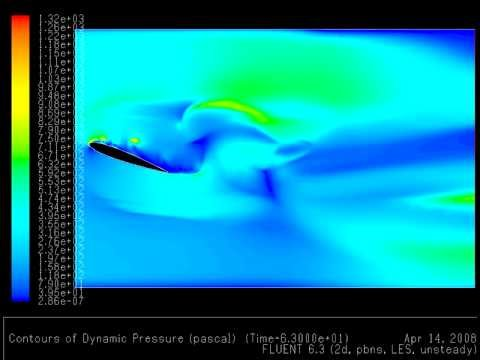

In [10]:
from IPython.display import YouTubeVideo

YouTubeVideo("wcahAqSFZ8k", 560, 315, rel=0)

The profile is given by

$$
y^{\pm}(x) = \pm(0.2969 \sqrt{x} - 0.126 x - 0.3516 x^2 + 0.2843 x^3 - 0.1015 x^4),
$$

in which $+$ gives the upper surface and $-$ gives the lower surface.

Find the point $x$ at which the thickness $t$ of the aerofoil is $0.1$, i.e. solve $f(x) = 0$ where $f(x) = y^+(x) - y^-(x) - 0.1$.

-   There will be two solutions for $x$ for this value of $t$.

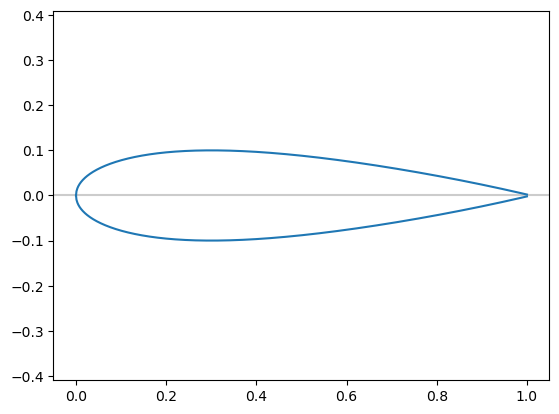

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    return yp


plt.axhline(0, color="0.8")  # x = 0

t = np.linspace(0, 1, 1000)
p = plt.plot(t, f(t))
plt.plot(t, -f(t), color=p[0].get_color())
plt.axis("equal")

plt.show()

# The bisection method

In [12]:
# Simple bisection implementation
def bisection(func, a, b, tol=1.0e-10):
    # Starting values
    fa = func(a)
    fb = func(b)

    while b - a > tol:
        # Find new mid point
        c = (a + b) / 2
        fc = func(c)

        # if root is in left half of interval
        if fa * fc < 0.0:
            # move right end
            b = c
            fb = fc
        else:
            # otherwise,
            # move the left end
            a = c
            fa = fc

    return (a + b) / 2

## Implict Euler with bisection for the nonlinear solve

Recall the differential equation:

$$
x'(t) = - 2 x(t)^3 \exp(-(1-x(t)^2)), \qquad \text{ subject to } \quad x(0) = 1.
$$

In [13]:
def f(x, t):
    return -2 * x**3 * np.exp(-(1 - x**2))

Recall the **implicit Euler method**:

$$
x^{(j+1)} = x^{(j)} + \mathrm{dt} f(t^{(j+1)}, x^{(j+1)})
$$

We cast this as a nonlinear equation to solve at each timestep: Find $x^{(j+1)}$ such that

$$
F(x^{(j+1)}) := x^{(j+1)} - x^{(j)} - \mathrm{dt} f(t^{(j+1)}, x^{(j+1)}) = 0.
$$

In [14]:
def implicit_euler(x0, dt, T):
    # initialise memory
    n = int(T / dt)
    x = np.empty(n + 1)
    t = np.empty(n + 1)

    # starting values
    x[0] = x0
    t[0] = 0.0

    # time loop
    for j in range(n):
        t[j + 1] = t[j] + dt

        # nonlinear function to solve each time step
        def F(xnew):
            return xnew - x[j] - dt * f(xnew, t[j + 1])

        # perform the nonlinear solve
        x[j + 1] = bisection(F, -1.0, 1.0)

    return x, t

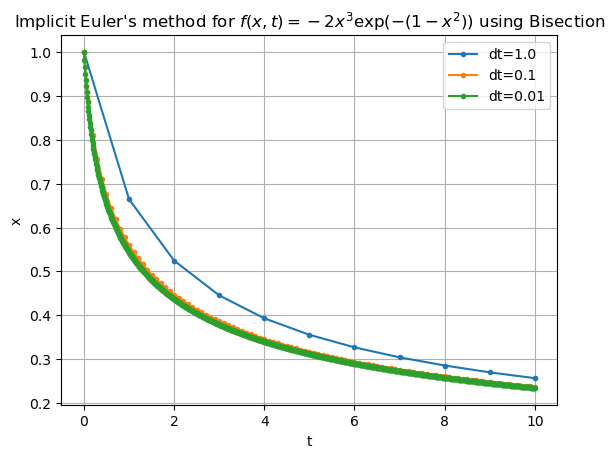

In [15]:
x, t = implicit_euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, ".-", label=f"dt=1.0")

x, t = implicit_euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.1")

x, t = implicit_euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, ".-", label=f"dt=0.01")

plt.title(
    "Implicit Euler's method for $f(x, t) = - 2 x^3 \exp(-(1-x^2))$ using Bisection"
)
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

In [16]:
import pandas as pd


def bisection(func, a, b, tol=1.0e-10):
    # table information
    headers = ["it", "a", "b", "f(a)", "f(b)", "update"]
    data = []

    # Starting values
    fa = func(a)
    fb = func(b)
    it = 0
    data.append([it, a, b, fa, fb, ""])

    while b - a > tol:
        # Find new mid point
        c = (a + b) / 2
        fc = func(c)

        # if root is in left half of interval
        if fa * fc < 0.0:
            # move right end
            b = c
            fb = fc
            update = "b <- c"
        else:
            # otherwise,
            # move the left end
            a = c
            fa = fc
            update = "a <- c"

        it += 1
        data.append([it, a, b, fa, fb, update])

    df = pd.DataFrame(data, columns=headers)
    return df.style.hide_index()

## Example 2

Use the bisection method to calculate the number of monthly repayments of £1,000 that are required to repay a mortgage of £150,000 at an annual rate of 5%.

It is clear that 1 monthly repayment ($n=1$) will not be sufficient, whilst we should try a very large value of $n$ to try to bracket the correct solution.

In [17]:
M = 1000
P = 150000
r = 5


def f(x):
    return M - P * ((r / 1200) * (1 + r / 1200) ** x) / ((1 + r / 1200) ** x - 1)

In [18]:
bisection(f, a=1, b=1000, tol=0.1)

it,a,b,f(a),f(b),update
0,1.000000,1000.000000,-149625.000000,365.070564,
1,1.000000,500.500000,-149625.000000,285.881715,b <- c
2,1.000000,250.750000,-149625.000000,34.705094,b <- c
3,125.875000,250.750000,-533.775512,34.705094,a <- c
4,188.312500,250.750000,-151.077416,34.705094,a <- c
5,219.531250,250.750000,-44.091479,34.705094,a <- c
6,235.140625,250.750000,-1.873702,34.705094,a <- c
7,235.140625,242.945312,-1.873702,17.052326,b <- c
8,235.140625,239.042969,-1.873702,7.756305,b <- c
9,235.140625,237.091797,-1.873702,2.984085,b <- c


## Example 3

Use the bisection method to find the points at which the thickness of the NACA0012 aerofoil is 0.1 with an error of less than $10^{-4}$.

It can be seen that $0 \le x^* \le 1$ but there are two solutions in this interval, so try $[x_L, x_R] = [0.5, 1]$ as the initial bracket.

In [19]:
def f(x):
    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    t = 0.1
    return yp - 0.5 * t

In [20]:
bisection(f, a=0.5, b=1.0, tol=1.0e-4)

it,a,b,f(a),f(b),update
0,0.500000,1.000000,0.038234,-0.047900,
1,0.750000,1.000000,0.002672,-0.047900,a <- c
2,0.750000,0.875000,0.002672,-0.020758,b <- c
3,0.750000,0.812500,0.002672,-0.008606,b <- c
4,0.750000,0.781250,0.002672,-0.002859,b <- c
5,0.750000,0.765625,0.002672,-0.000067,b <- c
6,0.757812,0.765625,0.001309,-0.000067,a <- c
7,0.761719,0.765625,0.000623,-0.000067,a <- c
8,0.763672,0.765625,0.000279,-0.000067,a <- c
9,0.764648,0.765625,0.000106,-0.000067,a <- c


# Example 4

What about if the root is a turning point?

$$
f(x) = (x-1)^2 = x^2 - 2x + 1.
$$

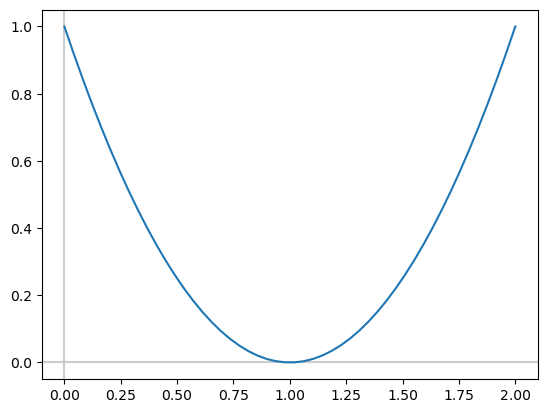

In [35]:
plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

x = np.linspace(0, 2)
y = (x - 1) ** 2

plt.plot(x, y)
plt.show()

## Summary

|                    | Bisection         |
|--------------------|-------------------|
| Simple algorithm   | yes               |
| Starting values    | bracket           |
| Iterations         | lots              |
| Function evals     | one per iteration |
| Convergence        | with good bracket |
| Turing point roots | no                |
| Use of derivative  | no                |

# Newton's method

In [22]:
def newton(f, df, x0, tol=1.0e-10):
    x = x0

    while abs(f(x)) > tol:
        x = x - f(x) / df(x)

    return x

In [23]:
def newton(f, df, x0, tol=1.0e-10):
    x = x0
    fx = f(x)

    while abs(fx) > tol:
        x = x - fx / df(x)
        fx = f(x)  # only one function evaluation per loop

    return x

## Examples

In [24]:
import pandas as pd
import sys


def newton(f, df, x0, tol=1.0e-10, maxiter=100):
    x = np.double(x0)
    it = 0

    headers = ["iter", "x", "f(x)"]
    data = []
    data.append([it, x, f(x)])

    while abs(f(x)) > tol:
        it += 1
        x = x - f(x) / df(x)
        data.append([it, x, f(x)])

        if it > maxiter:
            sys.stderr.write(
                "WARNING! Newton iteration has not converged. Too many iterations.\n"
            )
            break

    df = pd.DataFrame(data, columns=headers)
    return df.style.hide_index()

Starting from $x^{(0)} = 1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.765789$ after 2 iterations for the NACA0012 aerofoil example:

In [25]:
def f(x):
    t = 0.1

    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    f = yp - 0.5 * t

    return f


def df(x):
    dy = (
        -4 * 0.1015 * np.power(x, 3)
        + 3 * 0.2843 * np.power(x, 2)
        - 2 * 0.3516 * x
        - 0.126
        + 0.2969 * 0.5 * np.power(x, -0.5)
    )
    f = dy

    return f

In [26]:
newton(f, df, x0=1.0, tol=1.0e-4)

iter,x,f(x)
0,1.000000,-0.047900
1,0.795168,-0.005392
2,0.765789,-0.000096


Starting from $x^{(0)} = 0.1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.033863$ after 5 iterations for the second solution to the NACA0012 aerofoil example.

In [27]:
newton(f, df, x0=0.1, tol=1.0e-4)

iter,x,f(x)
0,0.100000,0.028046
1,0.000278,-0.045086
2,0.005413,-0.028849
3,0.020693,-0.010046
4,0.031958,-0.001300
5,0.033863,-0.000024


In [28]:
# comparison against bisection method
bisection(f, a=0.5, b=1.0, tol=1.0e-4)

it,a,b,f(a),f(b),update
0,0.500000,1.000000,0.038234,-0.047900,
1,0.750000,1.000000,0.002672,-0.047900,a <- c
2,0.750000,0.875000,0.002672,-0.020758,b <- c
3,0.750000,0.812500,0.002672,-0.008606,b <- c
4,0.750000,0.781250,0.002672,-0.002859,b <- c
5,0.750000,0.765625,0.002672,-0.000067,b <- c
6,0.757812,0.765625,0.001309,-0.000067,a <- c
7,0.761719,0.765625,0.000623,-0.000067,a <- c
8,0.763672,0.765625,0.000279,-0.000067,a <- c
9,0.764648,0.765625,0.000106,-0.000067,a <- c


## Zero derivative as a root

-   We saw that the bisection method cannot deal with the situation where a root occurs at a *turning point*. That is,

    $$
    f(x^*) = f'(x^*) = 0.
    $$

-   At first sight, it may appear that Newton's method will struggle with such situations since $x^{(i+1)} = x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}$ would lead to $\frac{0}{0}$ occurring when $x^{(i)} = x^*$.

-   Fortunately, this is not a problem in practice and the iteration can still converge - although it converges more slowly than to a "simple root".

### Zero derivative as a root - example

Find a solution of $f(x) = 0$ using Newton's method when

$$
f(x) = (x-1)^2 = x^2 - 2x + 1.
$$

This has a solution $x^* = 1$, however $f'(x) = 2x - 2$, so $f'(x^*) = 0$ when $x = x^*= 1$.

In [29]:
def f(x):
    return (x - 1) ** 2


def df(x):
    return 2 * (x - 1)

In [30]:
newton(f, df, x0=4.0, tol=1.0e-4)

iter,x,f(x)
0,4.000000,9.000000
1,2.500000,2.250000
2,1.750000,0.562500
3,1.375000,0.140625
4,1.187500,0.035156
5,1.093750,0.008789
6,1.046875,0.002197
7,1.023438,0.000549
8,1.011719,0.000137
9,1.005859,0.000034


## Problems with Newton's methods

When Newton's method works it is a fast way of solving a nonlinear equation $f(x) = 0$, but it does not always work.

1.  Consider applying a Newton iteration to the function $f(x) = x^3 + 2 x^2 + x + 1$ with $x^{(0)} = 0$.

    This gives $f'(x) = 3 x^2 + 4 x + 1$. With $x^{(0)} = 0$ this gives:

In [31]:
def f(x):
    return x**3 + 2 * x**2 + x + 1


def df(x):
    return 3 * x**2 + 4 * x + 1


newton(f, df, x0=0)

/tmp/ipykernel_365908/1973165566.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  x = x - f(x) / df(x)
/tmp/ipykernel_365908/2157450432.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return x**3 + 2 * x**2 + x + 1


iter,x,f(x)
0,0.000000,1.000000
1,-1.000000,1.000000
2,-inf,nan


2.  We can also get cases where the iteration does not "blow up" but diverges slowly...

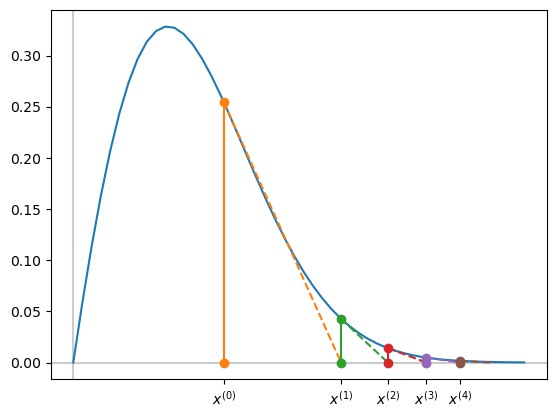

In [32]:
def f(t):
    return np.log(t + 1) * np.exp(-(t**2))


def df(t):
    return np.exp(-(t**2)) / (t + 1) - 2 * t * np.log(t + 1) * np.exp(-(t**2))


plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

x = np.linspace(0, 3)
y = f(x)

plt.plot(x, y)

x = 1.0
ticks = []
ticklabels = []

for i in range(5):
    p0 = plt.plot([x, x], [0, f(x)], "o-")
    ticks.append(x)
    ticklabels.append(r"$x^{(" + str(i) + ")}$")

    x_new = x - f(x) / df(x)
    plt.plot([x, x_new], [f(x), 0], "--", color=p0[0].get_color())
    x = x_new

plt.xticks(ticks, ticklabels)
plt.show()

3.  It is even possible for the iteration to simply cycle between two values repeatedly...

In [33]:
def f(t):
    return t**3 - 2 * t + 2


def df(t):
    return 3 * t**2 - 2


newton(f, df, x0=1.0)

WARNING! Newton iteration has not converged. Too many iterations.


iter,x,f(x)
0,1.000000,1.000000
1,0.000000,2.000000
2,1.000000,1.000000
3,0.000000,2.000000
4,1.000000,1.000000
5,0.000000,2.000000
6,1.000000,1.000000
7,0.000000,2.000000
8,1.000000,1.000000
9,0.000000,2.000000


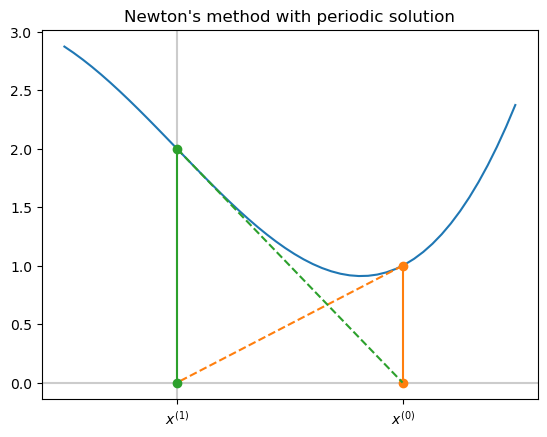

In [34]:
plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

x = np.linspace(-0.5, 1.5)
y = f(x)

plt.plot(x, y)

x = 1.0
ticks = []
ticklabels = []

for i in range(2):
    p0 = plt.plot([x, x], [0, f(x)], "o-")
    ticks.append(x)
    ticklabels.append(r"$x^{(" + str(i) + ")}$")

    x_new = x - f(x) / df(x)
    plt.plot([x, x_new], [f(x), 0], "--", color=p0[0].get_color())
    x = x_new

plt.xticks(ticks, ticklabels)
plt.title("Newton's method with periodic solution")
plt.show()

# Summary

|                    | Bisection         | Newton's method            |
|--------------------|-------------------|----------------------------|
| Simple algorithm   | yes               | yes                        |
| Starting values    | bracket           | one                        |
| Iterations         | lots              | normally fewer             |
| Function evals     | one per iteration | `f` and `df` per iteration |
| Convergence        | with good bracket | not always                 |
| Turing point roots | no                | slower                     |
| Use of derivative  | no                | yes                        |